In [1]:
import numpy as np
import pandas as pd

In [2]:
Black_Friday = pd.read_csv('BlackFriday.csv')

In [3]:
Black_Friday

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,NaN,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15.0,NaN,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,16.0,NaN,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,NaN,NaN,7871


In [4]:
from sklearn import preprocessing

In [5]:
le = preprocessing.LabelEncoder()
Black_Friday['Gender'] = le.fit_transform(Black_Friday['Gender'])

In [6]:
le = preprocessing.LabelEncoder()
Black_Friday['Age'] = le.fit_transform(Black_Friday['Age'])

In [7]:
le = preprocessing.LabelEncoder()
Black_Friday['Stay_In_Current_City_Years'] = le.fit_transform(Black_Friday['Stay_In_Current_City_Years'])

In [98]:
MEAN = Black_Friday.groupby('User_ID').mean()

In [99]:
# Black_Friday.groupby('User_ID').size()

In [100]:
numerical_data = MEAN.iloc[:,[0,1,3,4]]

In [101]:
numerical_data['Purchase'] = Black_Friday.groupby('User_ID').sum()['Purchase']

C:\Users\wsyou\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [102]:
numerical_data['Size'] = Black_Friday.groupby('User_ID').size()

C:\Users\wsyou\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [88]:
# numerical_data = preprocessing.normalize(numerical_data, norm = 'max', axis = 0)

In [36]:
# numerical_data[:,4] *= 10

In [103]:
# numerical_data

In [37]:
# from sklearn.decomposition import PCA

In [38]:
# pca = PCA(0.9)
# lower_dimensional_data = pca.fit_transform(numerical_data)

In [96]:
# lower_dimensional_data.shape

In [97]:
# lower_dimensional_data

In [18]:
from sklearn.cluster import KMeans

In [124]:
from sklearn import mixture

In [147]:
kmeans = KMeans(n_clusters=4)
#kmeans.fit(lower_dimensional_data)
kmeans.fit(numerical_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [148]:
# Mixtrue = mixture.GaussianMixture(n_components=4)
# Mixtrue.fit(numerical_data)
# type_ = Mixtrue.predict(numerical_data)

In [149]:
#type_ = kmeans.predict(lower_dimensional_data)
type_ = kmeans.predict(numerical_data)

In [150]:
#numerical_data

In [151]:
import matplotlib.pyplot as plt

In [152]:
# plt.scatter(numerical_data[type_ == 0][:,5], numerical_data[type_ == 0][:,4], color = 'r')
# plt.scatter(numerical_data[type_ == 1][:,5], numerical_data[type_ == 1][:,4], color = 'b')
# plt.scatter(numerical_data[type_ == 2][:,5], numerical_data[type_ == 2][:,4], color = 'y')
# plt.scatter(numerical_data[type_ == 3][:,5], numerical_data[type_ == 3][:,4], color = 'g')

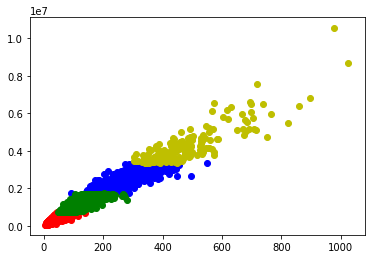

In [153]:
plt.scatter(numerical_data[type_ == 0].iloc[:,5], numerical_data[type_ == 0].iloc[:,4], color = 'r')
plt.scatter(numerical_data[type_ == 1].iloc[:,5], numerical_data[type_ == 1].iloc[:,4], color = 'b')
plt.scatter(numerical_data[type_ == 2].iloc[:,5], numerical_data[type_ == 2].iloc[:,4], color = 'y')
plt.scatter(numerical_data[type_ == 3].iloc[:,5], numerical_data[type_ == 3].iloc[:,4], color = 'g')

In [64]:
# plt.scatter(numerical_data[:,4], type_)

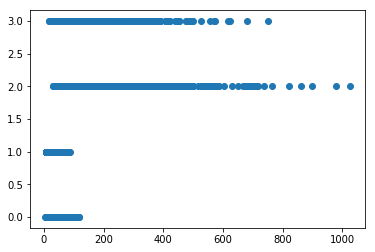

In [139]:
plt.scatter(numerical_data.iloc[:,5], type_)

In [192]:
Black_Friday.groupby('User_ID').mean()['Marital_Status'].std()

0.4935943482339708

In [194]:
Black_Friday.groupby('User_ID').mean()['Gender'].std()

0.4504003262392779